## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import seaborn as sns
sns.set()
from mpl_toolkits.mplot3d import Axes3D

## Generate Dataset with only one Predictor

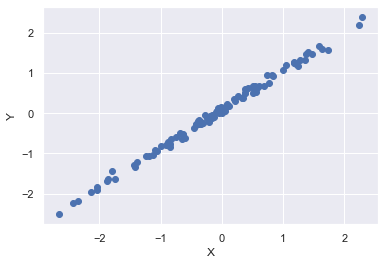

In [2]:
X, Y = make_regression(n_samples=100, n_features=1, n_informative=1, noise=4.5, random_state=2)
X.shape, Y.shape
Y = (Y-np.mean(Y))/np.std(Y)
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Linear Regression
> Aim is to minimize the sum of squared errors. 

> In this case, predictors = 1: Y = *$\beta$0* + *$\beta$1*X 

> Cost function is defined as: *J($\theta$)* = 1/2 * $\Sigma$ $(h(xi) - yi)^2$


**LMS algo ( Gradient Descent)** -  
 > $\beta$j = $\beta$j - $\alpha$* $\delta$(J($\theta$)) / $\delta$($\beta$j)
 
 > After solving, $\beta$j = $\beta$j - $\alpha$*(yi - h(xi))**xj

In [3]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x

def grad(X,Y,theta):
    m = X.shape[0]
    grads = np.zeros(2)
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        grads[0] += hx - Y[i]
        grads[1] += (hx - Y[i])*X[i]
        
    return grads

def error(X,Y,theta):
    m = X.shape[0]
    err = 0
    for i in range(m):
        hx = hypothesis(X[i],theta)
        err += 0.5*((hx-Y[i])**2)
    return err

def gradientDescent(X,Y,learning_rate = 0.001,max_itr = 100):
    loss = []
    theta_list = []
    theta = np.array([-50.0,15.0]) # Any random value
    m = X.shape[0]
    itr = 0
    for itr in range(max_itr):
        grads = grad(X,Y,theta)
        e = error(X,Y,theta)
        loss.append(e)
        theta_list.append(theta)
        theta[0] = theta[0] - learning_rate*grads[0]
        theta[1] = theta[1] - learning_rate*grads[1]
        
    return theta,loss,theta_list

In [4]:
theta, err_list, theta_list = gradientDescent(X,Y)

### Plot Error vs Iterations

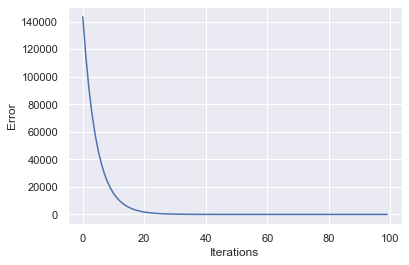

In [5]:
plt.plot(err_list)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()

### Plot Predicted line with data points

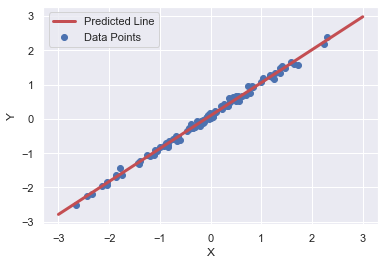

In [6]:
xp = np.linspace(-3,3,10)
yp = theta[1]*xp + theta[0]
plt.scatter(X,Y, label="Data Points")
plt.plot(xp, yp, label="Predicted Line",c='r', linewidth=3)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

### Plot Visualization Curve

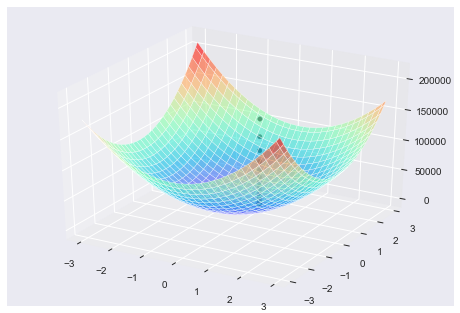

In [7]:
T0 = np.arange(-3,3,0.1)
T1 = np.arange(-3,3,0.1)
T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
m = T0.shape[0]
n = T0.shape[1]

for i in range(m):
    for j in range(n):
        J[i,j] = np.sum((Y - T1[i,j]*X - T0[i,j])**2)
plt.style.use('seaborn')        
fig = plt.figure()
axes = fig.gca(projection='3d')

theta_list = np.array(theta_list)
axes.scatter(theta_list[:,0],theta_list[:,1],err_list,c='k')

axes.plot_surface(T0,T1,J,cmap='rainbow',alpha=.6)
plt.show()

## Using SK-Learn

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr =LinearRegression()
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
lr.coef_, lr.intercept_

(array([0.96211016]), 0.09981039911442664)

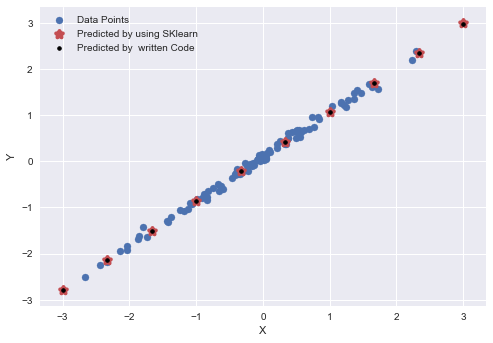

In [11]:
xp_ = np.linspace(-3,3,10)
yp_ = lr.coef_*xp_ + lr.intercept_
plt.scatter(X,Y, label="Data Points",alpha=1)

plt.scatter(xp_, yp_, label="Predicted by using SKlearn",c='r', linewidth=4, marker='*', alpha=1)
plt.scatter(xp, yp, label="Predicted by  written Code",c='black', linewidth=1, marker='.', alpha=1)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()